In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
features = pd.read_csv("../data/processed/features.csv")
tracks = pd.read_csv("../data/raw/SpotifyFeatures.csv")

genres = tracks['genre']


In [3]:
print(f"rows: {len(features)}")
print(f"columns: {len(features.columns)}")
print(features.info())

print("-" * 40)
print(features.describe())

rows: 176514
columns: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176514 entries, 0 to 176513
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   danceability        176514 non-null  float64
 1   energy              176514 non-null  float64
 2   loudness            176514 non-null  float64
 3   speechiness         176514 non-null  float64
 4   acousticness        176514 non-null  float64
 5   instrumentalness    176514 non-null  float64
 6   liveness            176514 non-null  float64
 7   valence             176514 non-null  float64
 8   tempo               176514 non-null  float64
 9   energy_dance_combo  176514 non-null  float64
 10  duration_min        176514 non-null  float64
dtypes: float64(11)
memory usage: 14.8 MB
None
----------------------------------------
        danceability         energy       loudness    speechiness  \
count  176514.000000  176514.000000  176514.000000  17651

In [4]:
print("\nmissing values")
print("-" * 40)
missing = features.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")



missing values
----------------------------------------
No missing values


In [5]:
print("-" * 40)
dup_count = tracks.duplicated(subset=['track_name', 'artist_name']).sum()

print(f"Duplicate songs: {dup_count}")

----------------------------------------
Duplicate songs: 0


In [6]:
print("-" * 40)

genre_counts = genres.value_counts()

print("Top 20 genres:")
print(genre_counts.head(20))


----------------------------------------
Top 20 genres:
genre
Comedy              9674
Electronic          9150
Alternative         9098
Anime               8935
Classical           8703
Reggae              8687
Reggaeton           8548
Soundtrack          8480
Blues               8474
Opera               8280
Folk                8050
Ska                 8010
Dance               7993
World               7961
Jazz                7957
Movie               7801
Hip-Hop             7414
Country             7382
Children's Music    5400
R&B                 5316
Name: count, dtype: int64


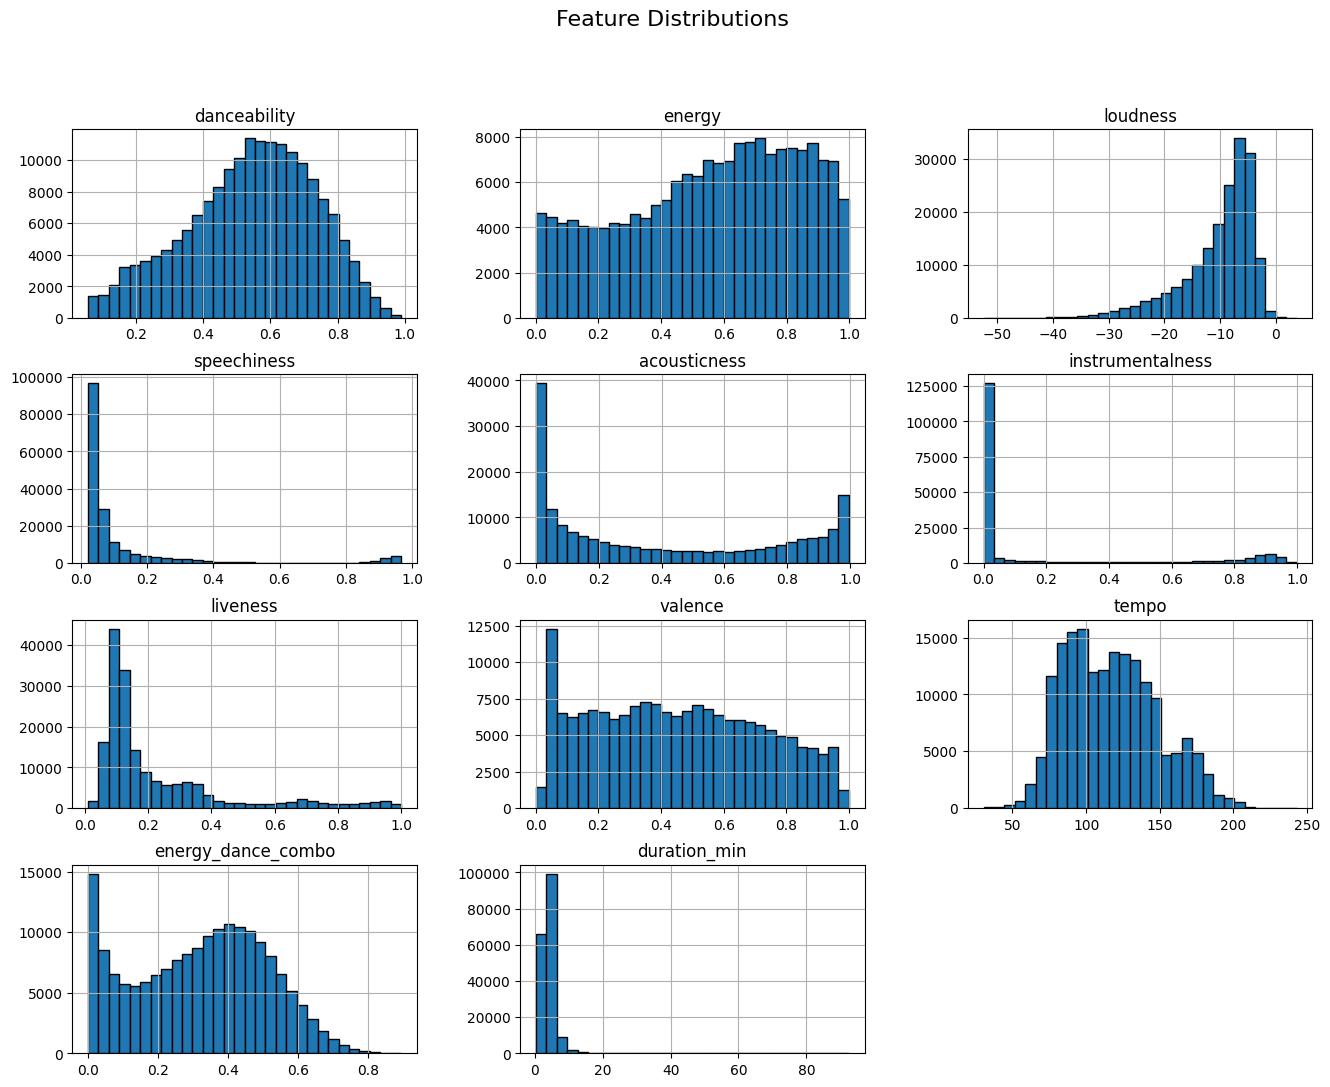

In [7]:
numeric_cols = features.select_dtypes(include='number').columns

features[numeric_cols].hist(bins=30,figsize=(16, 12),edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

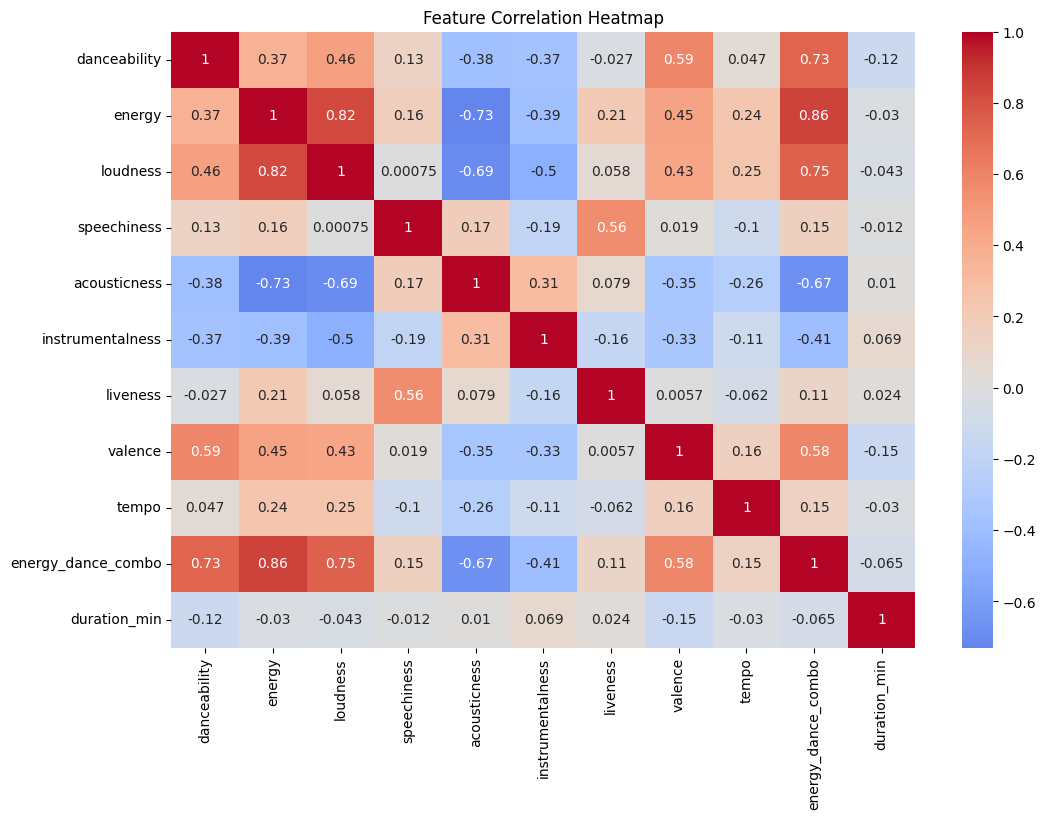

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(features[numeric_cols].corr(),cmap="coolwarm",annot=True,center=0)
plt.title("Feature Correlation Heatmap")
plt.show()